In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 13250 files belonging to 25 classes.


In [4]:
val_ds = keras.utils.image_dataset_from_directory(
    directory = 'val',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 1750 files belonging to 25 classes.


In [5]:
def process(image,label):
    image  = tf.cast(image/255.,tf.float32)
    return image , label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [8]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds,epochs = 150, validation_data = val_ds)

Epoch 1/150
415/415 [==============================] - 427s 1s/step - loss: 2.3745 - accuracy: 0.2858 - val_loss: 0.6507 - val_accuracy: 0.8446
Epoch 2/150
415/415 [==============================] - 404s 972ms/step - loss: 2.1876 - accuracy: 0.3302 - val_loss: 0.4295 - val_accuracy: 0.8874
Epoch 3/150
415/415 [==============================] - 401s 965ms/step - loss: 2.1607 - accuracy: 0.3364 - val_loss: 0.4635 - val_accuracy: 0.8886
Epoch 4/150
415/415 [==============================] - 422s 1s/step - loss: 2.1450 - accuracy: 0.3428 - val_loss: 0.3889 - val_accuracy: 0.8794
Epoch 5/150
415/415 [==============================] - 434s 1s/step - loss: 2.1292 - accuracy: 0.3528 - val_loss: 0.5615 - val_accuracy: 0.8863
Epoch 6/150
415/415 [==============================] - 439s 1s/step - loss: 2.0851 - accuracy: 0.3667 - val_loss: 0.4090 - val_accuracy: 0.9011
Epoch 7/150
415/415 [==============================] - 428s 1s/step - loss: 2.0260 - accuracy: 0.3899 - val_loss: 0.8645 - val_acc

415/415 [==============================] - 425s 1s/step - loss: 0.2531 - accuracy: 0.9264 - val_loss: 1.4130 - val_accuracy: 0.9280
Epoch 58/150
415/415 [==============================] - 425s 1s/step - loss: 0.2411 - accuracy: 0.9278 - val_loss: 1.5350 - val_accuracy: 0.8811
Epoch 59/150
415/415 [==============================] - 428s 1s/step - loss: 0.2417 - accuracy: 0.9291 - val_loss: 1.2497 - val_accuracy: 0.9349
Epoch 60/150
415/415 [==============================] - 426s 1s/step - loss: 0.2540 - accuracy: 0.9278 - val_loss: 1.4197 - val_accuracy: 0.9263
Epoch 61/150
415/415 [==============================] - 425s 1s/step - loss: 0.2402 - accuracy: 0.9286 - val_loss: 1.4623 - val_accuracy: 0.9320
Epoch 62/150
415/415 [==============================] - 424s 1s/step - loss: 0.2421 - accuracy: 0.9285 - val_loss: 1.6360 - val_accuracy: 0.9263
Epoch 63/150
415/415 [==============================] - 425s 1s/step - loss: 0.2416 - accuracy: 0.9292 - val_loss: 1.5790 - val_accuracy: 0.922

415/415 [==============================] - 426s 1s/step - loss: 0.1987 - accuracy: 0.9382 - val_loss: 2.1637 - val_accuracy: 0.9280
Epoch 114/150
415/415 [==============================] - 426s 1s/step - loss: 0.2061 - accuracy: 0.9390 - val_loss: 2.0353 - val_accuracy: 0.9246
Epoch 115/150
415/415 [==============================] - 436s 1s/step - loss: 0.2080 - accuracy: 0.9385 - val_loss: 2.2265 - val_accuracy: 0.9246
Epoch 116/150
415/415 [==============================] - 426s 1s/step - loss: 0.2109 - accuracy: 0.9371 - val_loss: 1.5728 - val_accuracy: 0.9320
Epoch 117/150
415/415 [==============================] - 425s 1s/step - loss: 0.1879 - accuracy: 0.9414 - val_loss: 1.5581 - val_accuracy: 0.9314
Epoch 118/150
415/415 [==============================] - 426s 1s/step - loss: 0.1883 - accuracy: 0.9398 - val_loss: 1.6045 - val_accuracy: 0.9360
Epoch 119/150
415/415 [==============================] - 427s 1s/step - loss: 0.2025 - accuracy: 0.9395 - val_loss: 2.2742 - val_accuracy:

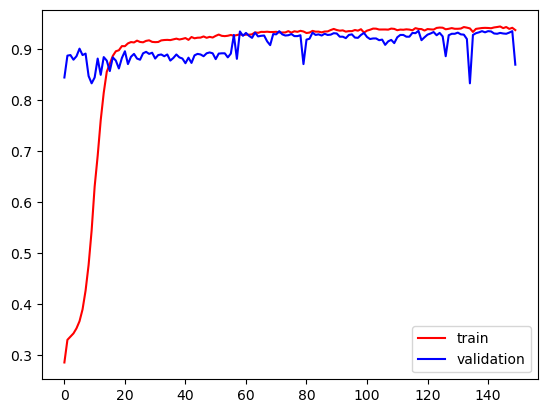

In [10]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

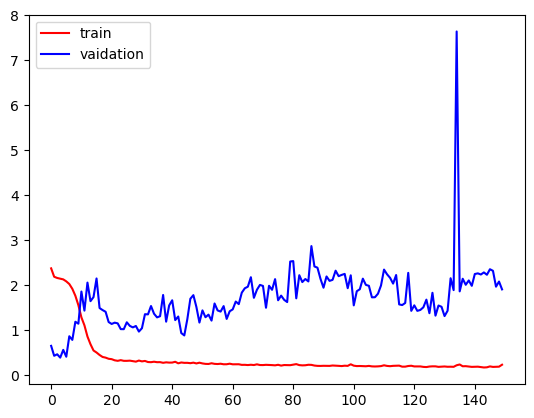

In [11]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()